# The Curse of Dimensionality

In [20]:
import numpy as np
import mnist
from matplotlib import pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from itertools import product, combinations
mpl.rcParams['figure.figsize'] = [2, 2] # inches
mpl.rcParams['font.size'] = 8

from scipy.stats import mode
def knn(test_set, train_set, train_labels, k):
    ### Returns the most common label in the training set of the k-nn for each element in the test set.
    predictions = []
    for i in test_set:
        distances = [np.linalg.norm(i-j) for j in train_set]
        indices = np.argsort(distances)[0:k]
        predictions.append(mode(train_labels[indices])[0][0])
    return predictions

def knn_evaluate(predicted_labels, true_labels):
    confusion_matrix = np.zeros([10,10])
    for i, l in enumerate(true_labels):
        confusion_matrix[l, predicted_labels[i]] += 1
    for i,c in enumerate(confusion_matrix):
        print(str(i) + ' & ' + ' & '.join(['{:3.0f}'.format(i) for i in c]) + '\\ \hline')
    plt.imshow(confusion_matrix,cmap='gray')
    plt.tight_layout()
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    print(sum(confusion_matrix.diagonal())/sum(sum(confusion_matrix)))

train_set = mnist.train_images()
train_labels = mnist.train_labels()
test_set = mnist.test_images()
test_labels = mnist.test_labels()

# Vectorise
test_set = np.squeeze(np.array([np.reshape(i,(1,-1)) for i in test_set]))
train_set = np.squeeze(np.array([np.reshape(i,(1,-1)) for i in train_set]))
print(test_set.shape)
print(train_set.shape)

# Choose 1000 examples of each class
train_index = []
test_index = []
for i in range(10):
    train_index.append(np.where(train_labels==i)[0][0:1000])
    test_index.append(np.where(test_labels==i)[0][0:100])
train_index = [item for sublist in train_index for item in sublist]
test_index = [item for sublist in test_index for item in sublist]

(10000, 784)
(60000, 784)


Let's try something (literally) random. Create an array of 40 normalised random vectors in 784-dimensional space and project the data onto each of them, Then classify on the result.

0 &  99 &   0 &   0 &   0 &   0 &   0 &   1 &   0 &   0 &   0\ \hline
1 &   0 & 100 &   0 &   0 &   0 &   0 &   0 &   0 &   0 &   0\ \hline
2 &   2 &   6 &  74 &   3 &   1 &   0 &   2 &   7 &   5 &   0\ \hline
3 &   1 &   2 &   1 &  85 &   0 &   3 &   3 &   2 &   1 &   2\ \hline
4 &   0 &   2 &   0 &   0 &  82 &   0 &   2 &   1 &   0 &  13\ \hline
5 &   4 &   2 &   0 &   2 &   2 &  83 &   1 &   3 &   1 &   2\ \hline
6 &   1 &   0 &   2 &   0 &   1 &   1 &  95 &   0 &   0 &   0\ \hline
7 &   0 &   3 &   0 &   1 &   2 &   0 &   0 &  89 &   0 &   5\ \hline
8 &   4 &   4 &   0 &   5 &   4 &   6 &   1 &   1 &  71 &   4\ \hline
9 &   0 &   0 &   0 &   1 &   3 &   0 &   0 &   5 &   2 &  89\ \hline
0.867


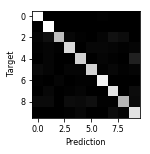

In [21]:
from sklearn.preprocessing import normalize
R = normalize(np.random.randn(784,40), axis=0)
p = knn(np.matmul(np.array(test_set[test_index]),R), np.matmul(np.array(train_set[train_index]),R), train_labels[train_index], 7)
knn_evaluate(p, test_labels[test_index])
plt.savefig('../figures/classification/knn-mnist-k=7-rp40-confusion.pdf')

## Convergence of distances
First, we demonstrate that distances between points converge in high dimension. We generate 1 million uniformly distributed randm

In [22]:
dims = [5,10,20,50,100,200,500,1000]
min_distance = []
max_distance = []
for d in dims:
    points = 2*np.random.rand(1000000,d)-1
    min_distance.append(np.min(np.sqrt(np.sum(points*points, axis=1))))
    max_distance.append(np.max(np.sqrt(np.sum(points*points, axis=1))))

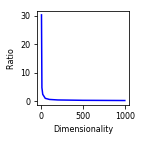

In [23]:
plt.figure()
plt.plot(dims, (np.array(max_distance)-np.array(min_distance))/np.array(min_distance), 'b-')
plt.xlabel('Dimensionality')
plt.ylabel('Ratio ')
plt.tight_layout()
plt.savefig('../figures/classification/minmax_ratios.pdf')

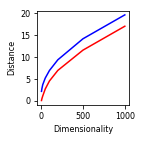

In [24]:
plt.figure()
plt.plot(dims, max_distance,'b-', dims,(min_distance), 'r-')
plt.xlabel('Dimensionality')
plt.ylabel('Distance')
plt.tight_layout()
plt.savefig('../figures/classification/minmaxdistances.pdf')

## Hypercube volume
The distance to the corner of a hypercube from its centre is $\sqrt(d)$. This means that is high dimensions, the hypersphere does not get close to the corners of its enclosing hypercube.

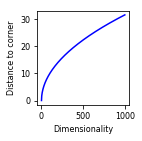

In [25]:
plt.figure()
x = np.linspace(0,1000,1001)
y = np.sqrt(x)
plt.plot(x,y,'b-')
plt.xlabel('Dimensionality')
plt.ylabel('Distance to corner')
plt.tight_layout()
plt.savefig('../figures/classification/hypercube-corner.pdf')

We can also calculate the proportion of volume of the hypercube occupied by the hypersphere. The cube has volume $(2r)^d$, whilst the volume of an $n$-dimensional sphere is $V_{n}(R)=\int _{0}^{R}{\frac {2\pi ^{\frac {n}{2}}}{\Gamma \left({\frac {n}{2}}\right)}}\,r^{n-1}\,dr={\frac {2\pi ^{\frac {n}{2}}}{n\Gamma \left({\frac {n}{2}}\right)}}R^{n}={\frac {\pi ^{\frac {n}{2}}}{\Gamma \left({\frac {n}{2}}+1\right)}}R^{n}$

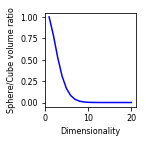

In [26]:
from math import gamma
d = np.linspace(1,20,20)
y1 = np.power(2,d)
y2 = np.array([np.power(np.pi,n/2)/gamma(1+n/2) for n in d])
plt.figure()
plt.plot(d,y2/y1,'b-')
plt.xlabel('Dimensionality')
plt.ylabel('Sphere/Cube volume ratio')
plt.tight_layout()
plt.savefig('../figures/classification/spheretocubevolume.pdf')

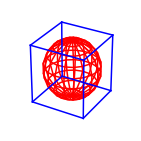

In [27]:
# This code has been adapted from that posted here:
# https://stackoverflow.com/questions/11140163/python-matplotlib-plotting-a-3d-cube-a-sphere-and-a-vector
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_aspect("equal")

# draw cube
r = [-1, 1]
for s, e in combinations(np.array(list(product(r, r, r))), 2):
    if np.sum(np.abs(s-e)) == r[1]-r[0]:
        ax.plot3D(*zip(s, e), color="b")

# draw sphere
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ax.plot_wireframe(x, y, z, color="r")

# draw a point
# ax.scatter([0], [0], [0], color="g", s=100)
plt.axis('off')
plt.tight_layout()
plt.savefig('../figures/classification/cubesphere.pdf')

## Random Projections
First, let's investigate the orthogonality of random vectors

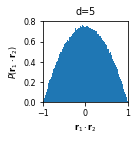

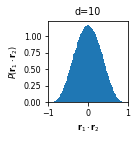

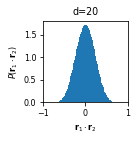

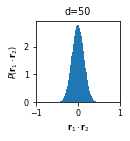

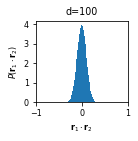

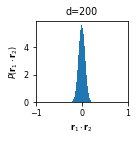

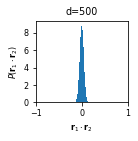

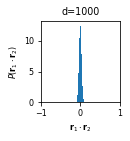

In [28]:
from sklearn.preprocessing import normalize
d = [5,10,20,50,100,200,500,1000]
for n in d:
    # each row of R is normalised
    R = normalize(np.random.randn(100000,n), axis=1)
    plt.figure()
    ax = plt.axes()
    plt.hist(R[np.tril_indices_from(R)], bins=100, density=True)
    plt.xlabel(r'$\mathbf{r}_1\cdot \mathbf{r}_2$')
    plt.ylabel(r'$P(\mathbf{r}_1\cdot \mathbf{r}_2)$')
    plt.title(r'd='+str(n))
    ax.set_xlim(-1,1)
    plt.tight_layout()
    plt.savefig('../figures/classification/random-histogram-d'+str(n)+'.pdf')

## Implications for MNIST
First, let's compute the pairwise distance for MNIST and plot them 

In [29]:
import mnist
train_set = mnist.train_images()
train_labels = mnist.train_labels()
test_set = mnist.test_images()
test_labels = mnist.test_labels()
# Vectorise
test_set = np.squeeze(np.array([np.reshape(i,(1,-1)) for i in test_set]))
train_set = np.squeeze(np.array([np.reshape(i,(1,-1)) for i in train_set]))
# Compute distances from each element of test set to each element of training set
distances = []
for i in test_set[0:1000]:
    distances.append([np.linalg.norm(i-j) for j in train_set[0:1000]])
distances = np.squeeze(np.array(distances).reshape((1,-1)))

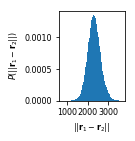

In [30]:
plt.figure()
ax = plt.axes()
plt.hist(distances, bins=100, density=True)
plt.xlabel(r'$||\mathbf{r}_1 - \mathbf{r}_2||$')
plt.ylabel(r'$P(||\mathbf{r}_1 - \mathbf{r}_2||)$')
plt.tight_layout()
plt.savefig('../figures/classification/mnist-distances.pdf')

In [31]:
print(np.mean(distances))
print(np.median(distances))
print(np.std(distances))

2317.615555729267
2310.4212819310656
312.9277896507789


## Dimensionality reduction
First, we demonstrate that there are redundant dimensions in the image data. We compute the map of the variance over the dataset

In [32]:
np.sum(train_set[0:1000])

25637533

In [33]:
image_cube = mnist.train_images()[0:1000]
std_image = np.std(image_cube, axis=0)
mean_image = np.mean(image_cube, axis=0)

175
0.22321428571428573


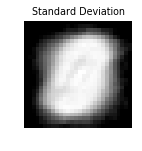

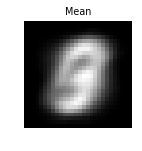

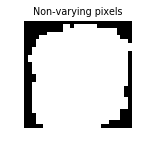

In [34]:
# Display mean and stdev images
plt.figure()
plt.imshow(std_image, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.title('Standard Deviation')
plt.savefig('mnist-std.pdf')
plt.figure()
plt.imshow(mean_image, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.title('Mean')
plt.savefig('mnist-mean.pdf')
# Image of zero variance pixels
plt.figure()
plt.imshow(std_image!=0, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.title('Non-varying pixels')
plt.savefig('mnist-non-varying.pdf')
# Proportion of non-varying pixels
print(np.sum(std_image==0))
print(np.sum(std_image==0)/784)

In [35]:
# Reverse sort the variance
image_std = np.sort(np.squeeze(std_image.reshape((1,-1))))[::-1]
cum_std = np.cumsum(image_std)

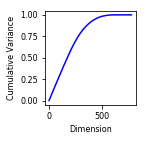

In [36]:
plt.figure()
plt.plot(cum_std/max(cum_std),'b-')
plt.xlabel('Dimension')
plt.ylabel('Cumulative Variance')
plt.tight_layout()
plt.savefig('../figures/classification/mnist-cumstd.pdf')

Repeat the histogram calculations after random projection

In [37]:
R = normalize(np.random.randn(40,784), axis=1)
rtest = np.matmul(R,test_set[0:1000].T).T
rtrain = np.matmul(R, train_set[0:1000].T).T
distances = []
for i in rtest[0:1000]:
    distances.append([np.linalg.norm(i-j) for j in rtrain[0:1000]])
distances = np.squeeze(np.array(distances).reshape((1,-1)))

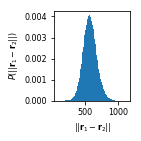

In [38]:
plt.figure()
ax = plt.axes()
plt.hist(distances, bins=100, density=True)
plt.xlabel(r'$||\mathbf{r}_1 - \mathbf{r}_2||$')
plt.ylabel(r'$P(||\mathbf{r}_1 - \mathbf{r}_2||)$')
plt.tight_layout()
plt.savefig('../figures/classification/rp-mnist-distances.pdf')

In [39]:
print(np.mean(distances))
print(np.median(distances))
print(np.std(distances))

577.7797810533585
574.3475964203149
103.41256468547662
